In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import seaborn as sns
import pickle

In [19]:
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [9]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
ProfileReport(df)

# removing zeros

In [11]:
df['BMI'] = df['BMI'].replace(0,df.BMI.mean())

In [12]:
df['BloodPressure'] = df['BloodPressure'].replace(0,df.BloodPressure.mean())

In [13]:
df['Insulin'] = df['Insulin'].replace(0,df.Insulin.mean())

In [14]:
df['Glucose'] = df['Glucose'].replace(0,df.Glucose.mean())

In [15]:
df['SkinThickness'] = df['SkinThickness'].replace(0,df.SkinThickness.mean())

# handling outliers

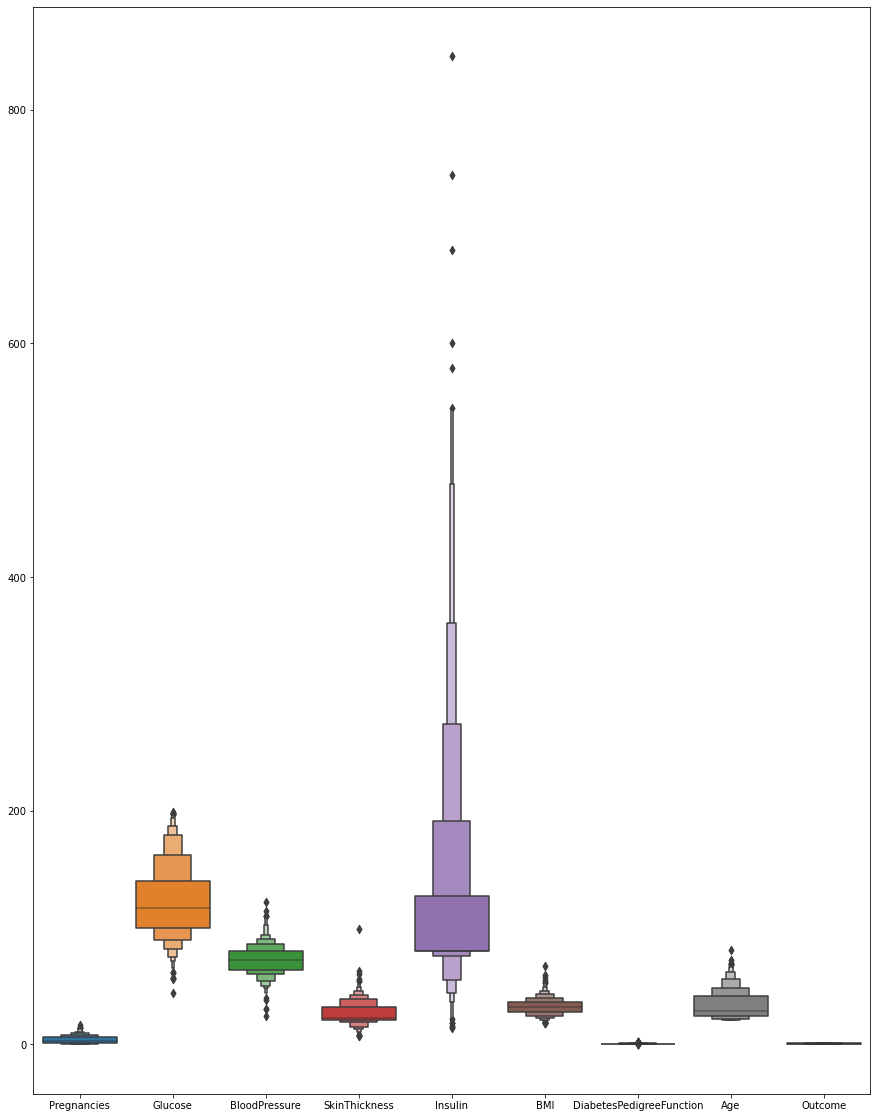

In [21]:
fig,ax = plt.subplots(figsize = (15,20))
sns.boxenplot(data = df,ax = ax)

In [30]:
q = df['Insulin'].quantile(.90)
df_new = df[df.Insulin < q]

In [31]:
df_new

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0      35.000000   79.799479  33.6   
1              1     85.0           66.0      29.000000   79.799479  26.6   
2              8    183.0           64.0      20.536458   79.799479  23.3   
3              1     89.0           66.0      23.000000   94.000000  28.1   
4              0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0      48.000000  180.000000  32.9   
764            2    122.0           70.0      27.000000   79.799479  36.8   
765            5    121.0           72.0      23.000000  112.000000  26.2   
766            1    126.0           60.0      20.536458   79.799479  30.1   
767            1     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[688 rows x 9 columns]

In [32]:
df.shape

(768, 9)

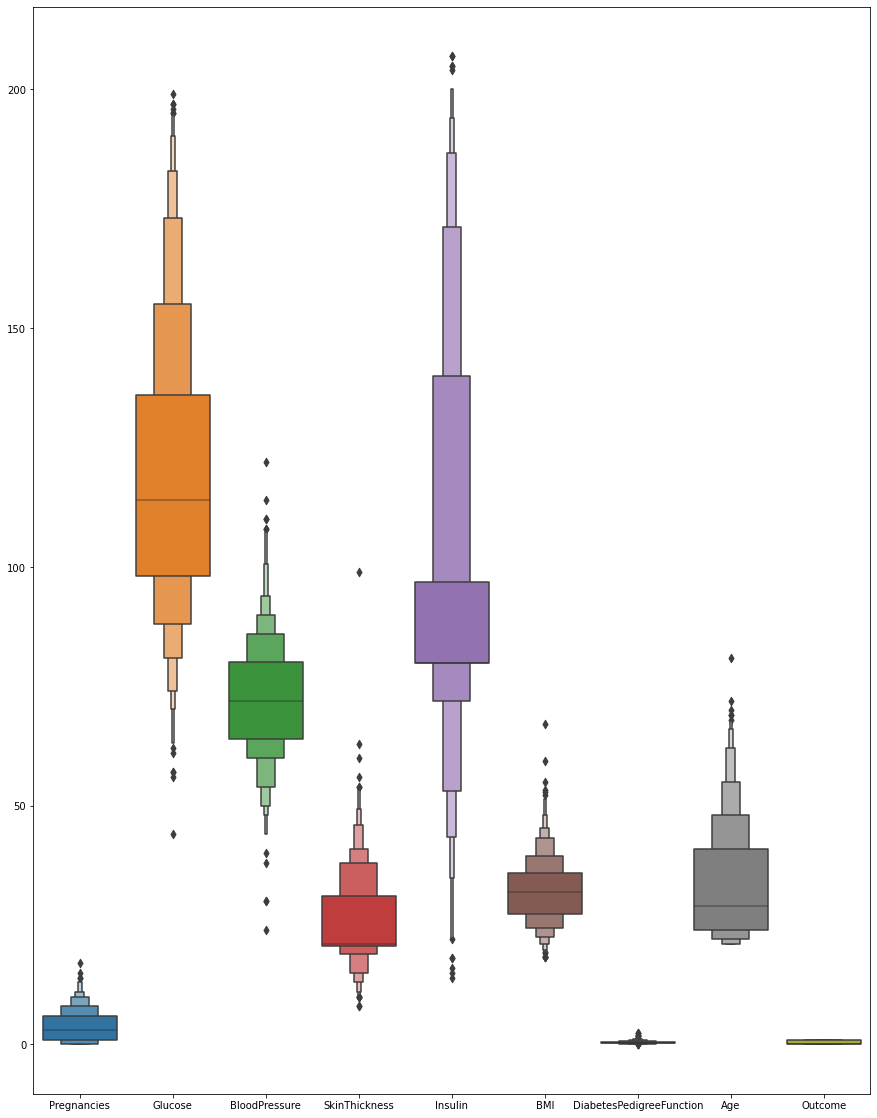

In [34]:
fig,ax = plt.subplots(figsize = (15,20))
sns.boxenplot(data = df_new,ax = ax)

In [41]:
q = df['Pregnancies'].quantile(.98)
df_new = df[df.Pregnancies < q]

In [42]:
q = df_new['BMI'].quantile(.99)
df_new = df_new[df_new.BMI < q]

In [43]:
q = df_new['SkinThickness'].quantile(.99)
df_new = df_new[df_new.SkinThickness < q]

In [44]:
q = df_new['Insulin'].quantile(.95)
df_new = df_new[df_new.Insulin < q]

q = df_new['DiabetesPedigreeFunction'].quantile(.99)
df_new = df_new[df_new.DiabetesPedigreeFunction < q]

In [46]:
q = df_new['Age'].quantile(.99)
df_new = df_new[df_new.Age < q]

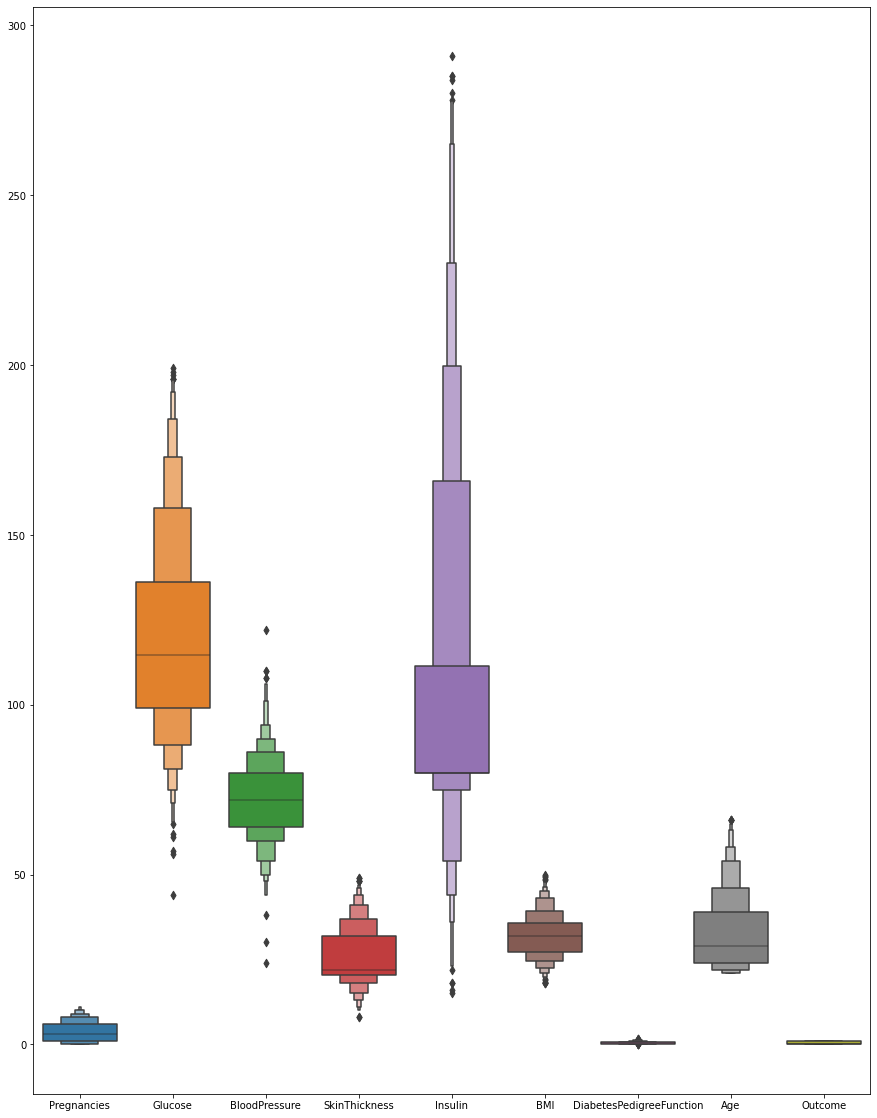

In [47]:
fig,ax = plt.subplots(figsize = (15,20))
sns.boxenplot(data = df_new,ax = ax)

In [48]:
df_new.shape

(674, 9)

In [49]:
#ProfileReport(df)

# splitting data into x and y 

In [50]:
x = df_new.drop(columns=['Outcome'])

In [51]:
y = df_new.Outcome

# Scaling Data

In [57]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(x))
# ProfileReport(scaled_data)

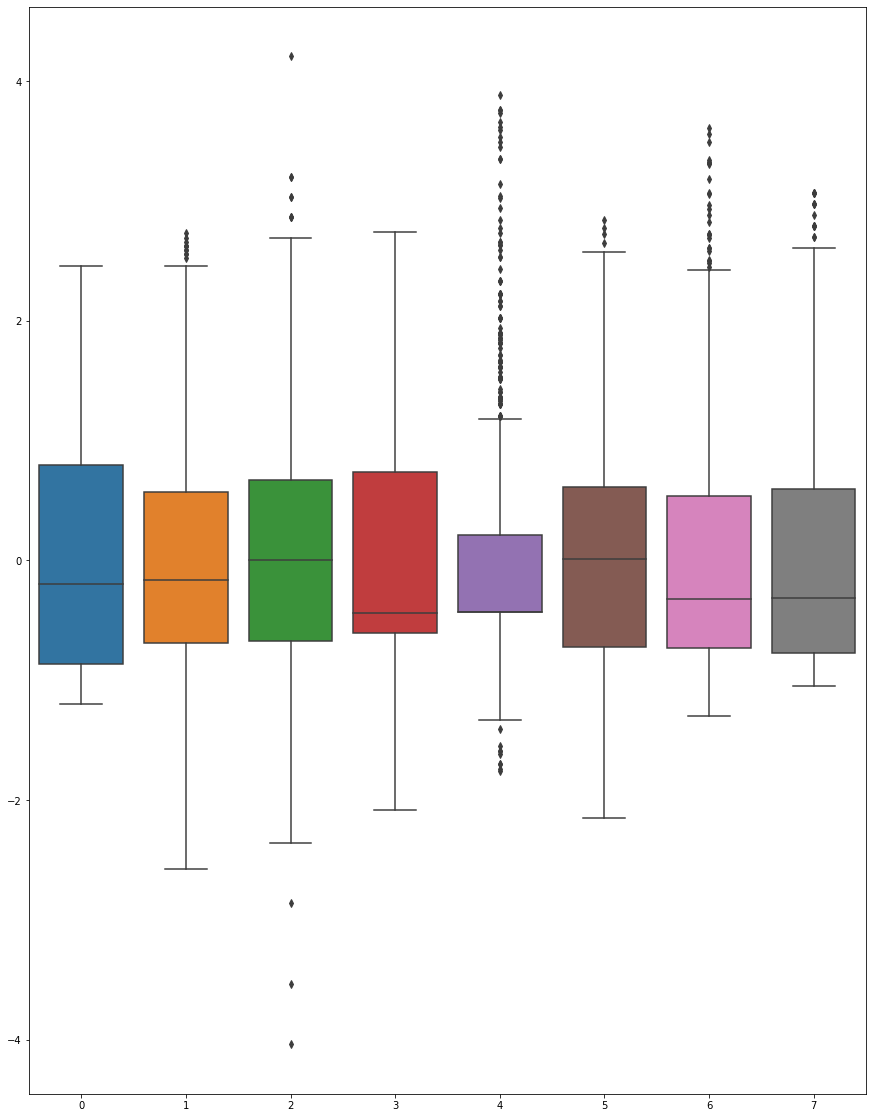

In [59]:
fig,ax = plt.subplots(figsize = (15,20))
sns.boxplot(data =scaled_data,ax =ax)


In [60]:
scaled_data

0         1         2         3         4         5         6  \
0    0.796754  0.983984  0.000453  1.091487 -0.434192  0.265820  0.630485   
1   -0.864794 -1.169776 -0.504474  0.385681 -0.434192 -0.831445 -0.338079   
2    1.461373  2.180518 -0.672784 -0.609921 -0.434192 -1.348727  0.788402   
3   -0.864794 -1.033030 -0.504474 -0.320125 -0.144202 -0.596317 -0.983787   
4    0.464444 -0.109989  0.168762 -0.609921 -0.434192 -0.988197 -0.864472   
..        ...       ...       ...       ...       ...       ...       ...   
669  2.125992 -0.622789  0.337071  2.620733  1.612009  0.156093 -0.969750   
670 -0.532484  0.095131 -0.167856  0.150413 -0.434192  0.767426 -0.376681   
671  0.464444  0.060944  0.000453 -0.320125  0.223377 -0.894146 -0.710063   
672 -0.864794  0.231877 -1.009402 -0.609921 -0.434192 -0.282813 -0.345097   
673 -0.864794 -0.896283 -0.167856  0.620950 -0.434192 -0.235787 -0.464413   

            7  
0    1.601415  
1   -0.132706  
2   -0.041437  
3   -1.045402  
4   -0.223976  
..        ...  
669  2.787919  
670 -0.497785  
671 -0.223976  
672  1.327607  
673 -0.862863  

[674 rows x 8 columns]

#  Finding Vif

In [79]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i],variance_inflation_factor(arr,i)]   for i in range(arr.shape[1])],columns=['Features','Vif_score'])
   

In [80]:
vif_score(x)

Features  Vif_score
0               Pregnancies   1.449056
1                   Glucose   1.304263
2             BloodPressure   1.262686
3             SkinThickness   1.470049
4                   Insulin   1.271017
5                       BMI   1.513160
6  DiabetesPedigreeFunction   1.042300
7                       Age   1.662728

# Train Test Split

In [83]:
X_train,X_test,y_train,y_test = train_test_split(scaled_data,y,test_size = 0.20,random_state = 144)

In [84]:
X_train.shape

(539, 8)

In [85]:
X_test.shape

(135, 8)

# Logistic Regression model

In [86]:
logr = LogisticRegression()